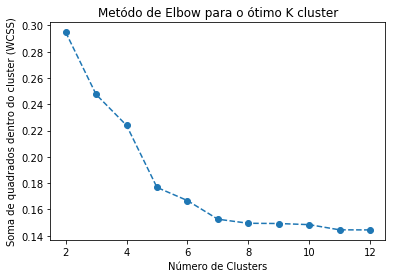

In [62]:
import pandas as pd
import operator
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
import warnings
warnings.filterwarnings("ignore")

def kmeans(elementos, centroids, n_clusters):
    data = {}
    for i in elementos:
        aux = {}
        for k in range(n_clusters):
            aux[k] = euclidean(i, centroids[k])
        key = sorted(aux.items(), key=operator.itemgetter(1), reverse=False)[0][0]
        if key not in data:
            data[key] = []
        data[key].append(i)
    return data


def new_centroids(old_centroids, data):
    for i in data:
        centroid = np.mean(data[i])
        old_centroids[i] = centroid
        new_centroids = old_centroids

    return new_centroids

def WCSS(novos_centroids, old_centroids, k):
    wcss=0
    for i in novos_centroids:
        for j in range(0,k):
            wcss+=np.sum(i - old_centroids[j])**2
    return wcss


def main():
    k = 13
    elements = pd.read_csv("agrupamento_Q1.csv")
    centroids = pd.read_csv("agrup_centroides_Q1.csv")
    centroids = centroids[['X1', 'X2', 'X3', 'X4']]
    
    elements = np.array(elements, dtype=float)
    centroids = np.array(centroids, dtype=float)
    
    for i in range(1,k):
        data_kmeans = kmeans(elements, centroids, i)
        #print(len(data_kmeans))
        
        WCSS_array=np.array([])
    
        for c in range(12):
            output = new_centroids(centroids, data_kmeans)
            wcss=0
            for c in range(c):
                wcss+=np.sum((output[c+1]-centroids[c,:])**2)
            WCSS_array=np.append(WCSS_array,wcss)
    
    
    K_array=np.arange(1,13,1)
    plt.plot(K_array,1/WCSS_array, '--o')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Soma de quadrados dentro do cluster (WCSS)')
    plt.title('Metódo de Elbow para o ótimo K cluster')
    plt.show()

    
    
main()